### Stackoverflow Question: Matplotlib: How to render only a small region of a larger figure

I use matplotlib to draw a contour plot. In a second step I would like to extract a small region from that plot and draw it in a new axis.

Here's the code to create the contour plot:
(based on this example : https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html )





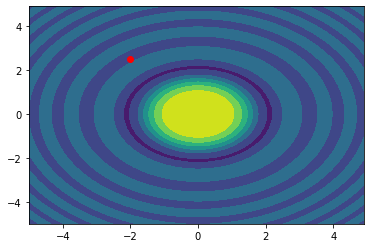

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.plot(-2, 2.5, 'or')
plt.show()





In [168]:
# visualize the error. Provide the given Data_X, _Y as default values

# To plot the error function, we use a meshgrid. This is efficient, but the code is a bit harder to read.
# It contains some technicalities which are not relevant for the SGD algorithm

def plot_error(X=Data_X, Y=Data_Y, a_min = 0.3, a_max=0.55, b_min=0.2, b_max = 1.1, nr_mesh_points_ab=25):
    # define the region of interest. 
    A = np.linspace(a_min, a_max, nr_mesh_points_ab)
    B = np.linspace(b_min, b_max, nr_mesh_points_ab)
    aa, bb = np.meshgrid(A, B)
    
    # we wrap the (four-param) error function into a two-parameter expression and inject the Data.
    # A vectorized form of this expression can then be called directly with the meshgrid coordinates aa, bb
    vect_sq_err=np.vectorize(lambda a, b: sq_err(X, Y, a,b))
    E = vect_sq_err(aa, bb)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
#     ax.set_aspect('equal')
    # plt.plot(aa, bb, marker='.', color='grey', linestyle='none', markersize=0.5)

    h = ax.contourf(A, B, E, levels=20, cmap=cm.coolwarm) # cmap="YlGnBu"
    fig.colorbar(h)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_title("Sum of squared errors as a function of a and b")
       
    return fig, ax


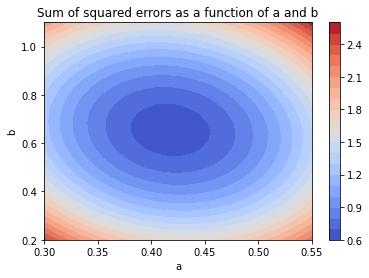

In [169]:
fig, ax = plot_error()

# idx = [1]
# plot_error(Data_X[idx], Data_Y[idx])


### Exercise:
We can now use this 2D plot to read out the value of the error for given parameters.

Q1: For each of the 3 following linear models, estimate the error

linear model #1: $y = 0.5x+1.0$

linear model #2: $y = 0.45x+0.8$

linear model #3: $y = 0.4x+0.5$

Q2: Now use the function *sq_err()* to calculate the sum of squared errors. Compare with your estimates.

Q3: Can we find a linear function for which the error goes to zero?

Q4: Look at the implementation of the function *plot_error()*. The 2D plot was created by evaluating the function *sq_err* at all points of a grid. How many times was the error calculated, that is, how many points are on the grid?

In [151]:
# sq_err()

# Gradient Descent

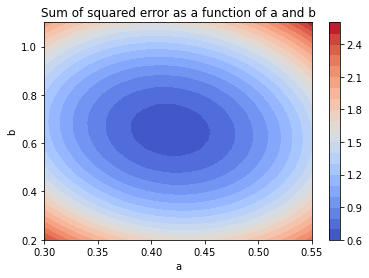

In [152]:
fig, ax = plot_error()

If we have access to this error plot, it is easy to estimate the best fitting parameters [a,b]: we simply pick the location [a,b] with the 'darkest blue'.

But computing this error-landscape is expensive! Even for the simple example here, the error was calculated more than 500 times. Furthermore, it was necessary to predefine the search-area and a resolution for the grid.

By looking at the figure, we can identify a more efficient strategy of finding the location with the lowest error: 

At any location [a,b] we can look at the (color-) gradient in the neighbourhood of [a,b] and move a (small) step in the direction where the color becomes 'more blue' (that is, where the error shrinks the most).
By repeating this procedure, we will eventually arrive at the location where the error is smallest.

This iterative procedure is, informally, the idea behind **Gradient Descent**. The method is more efficient, because we do not calculate the error E at many (unnecessary) location. Instead we only evaluate the gradient along a trajectory. 



## Exercise


In [262]:
# A helper to add a vector to the Error landscape. 
# The implementation of this function is not relevant for SGD.

def plot_error_and_grad(a0, da, b0, db, scaling = 1,
                        X=Data_X, Y=Data_Y, 
                        a_min = 0.3, a_max=0.55, b_min=0.2, b_max = 1.1, nr_mesh_points_ab=25):
        fig, axOrig = plot_error(X=Data_X, Y=Data_Y, a_min = 0.3, a_max=0.55, b_min=0.2, b_max = 1.1, nr_mesh_points_ab=25)

        da *= scaling
        db *= scaling
        a1 = a0 + da
        b1 = b0 + db

#         cp = patches.Circle( (a0, b0), radius = 0.08 )
#         p = ax.set_clip_path(cp)
#         axOrig.set_clip_box(Bbox([[a0-da, b0-da], [a0+da, b0+da]]))
#         fig.clf()
        fig2 = plt.figure()
        fig2.axes.append(axOrig)
#         plt.show()
        
#         ax.plot([a0, a1], [b0, b1], '-r')        
#         ax.plot(a0, b0, 'ko', markersize=6)
#         ax.plot(a1, b1, 'ow', markersize=6)
#         ax.plot(a1, b1, 'oy', markersize=4)

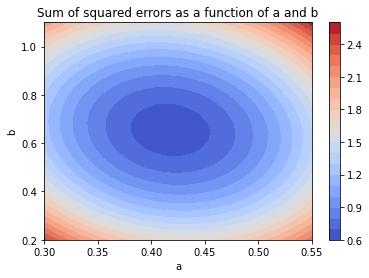

<Figure size 432x288 with 0 Axes>

In [263]:
plot_error_and_grad(a0=0.35, da=0.1, b0=1.0, db=-0.1, scaling=1.)

## Exercise
This is our error function:
$$
\begin{align}
E &= \sum_{i=1}^N e_i^2 \\
&= \sum_{i=1}^N (y_i - (a \cdot x_i + b))^2\\
\end{align}
$$

Our goal is to minimize this sum of the squared errors by iteratively changing $a$ and $b$.


Q1. Fresh up your knowledge about gradients. (https://en.wikipedia.org/wiki/Gradient)


Q2. For the Gradient Descent algorithm, we need the direction (in the a, b plane) of the *fastest change* (change of the error E). This direction is given by the  vector of partial derivatives:

\begin{align}
    Gradient of E = \begin{bmatrix}
           \frac{\partial E}{\partial a} \\
           \frac{\partial E}{\partial b} \\
         \end{bmatrix}
  \end{align}


Calculate these two partial derivatives.





